# Classification Models Using Keras (conventional neural network or artificial neural network)

## Objectives
    Use of MNIST database for training various image processing systems.
    Build a neural network.
    train and test the network.

In [1]:
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

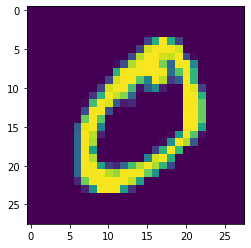

In [7]:
plt.imshow(X_train[1])

In [8]:
#flatten images into one dimensional vector
num_pixels=X_train.shape[1]* X_train.shape[2]

In [9]:
num_pixels

784

In [10]:
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
#normalize inputs from 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#one hot encode output
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [16]:
y_train.shape

(60000, 10)

In [17]:
num_classes=y_train.shape[1]

In [18]:
num_classes

10

In [19]:
#define classification model
def classification_model():
    model=Sequential()
    model.add(Dense(num_pixels, activation="relu", input_shape=(num_pixels,)))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    
    #compile the model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [20]:
#build a model
model=classification_model()

In [21]:
#fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 16s - loss: 0.1889 - accuracy: 0.9436 - val_loss: 0.0999 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 - 16s - loss: 0.0790 - accuracy: 0.9757 - val_loss: 0.0935 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 - 15s - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0760 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 - 16s - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0846 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 - 16s - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0737 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 - 16s - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0797 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 - 16s - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0813 - val_accuracy: 0.9805
Epoch 8/10
1875/1875 - 16s - loss: 0.0185 - accuracy: 0.9935 - val_loss: 0.0868 - val_accuracy: 0.9815
Epoch 9/10
1875/1875 - 16s - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0981 - val_accuracy: 0.9775
Epoch 10/10
1875/1875 - 16s - loss: 0.0154 - accuracy: 0.9951 - val_loss:

In [29]:
scores=model.evaluate(X_test, y_test, verbose=0)

In [30]:
scores

[0.15361368656158447, 0.9674999713897705]

In [31]:
accuracy=scores[1]
error=1-accuracy

In [32]:
accuracy

0.9674999713897705

In [33]:
error

0.03250002861022949

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([[6.07117221e-13, 6.08155123e-11, 4.00887171e-11, ...,
        1.00000000e+00, 9.30736391e-12, 3.67976183e-09],
       [9.27991001e-15, 9.10489652e-12, 1.00000000e+00, ...,
        2.23413325e-20, 1.76270944e-16, 2.39050156e-20],
       [2.10895768e-13, 9.99999881e-01, 1.81631182e-10, ...,
        1.50184878e-10, 4.64491645e-09, 1.76509740e-09],
       ...,
       [4.24597693e-23, 7.98353950e-13, 1.61263730e-22, ...,
        3.99133053e-11, 7.13885615e-16, 2.01367939e-07],
       [5.38483080e-23, 2.28986584e-26, 1.65757315e-25, ...,
        1.18269815e-20, 1.82733283e-19, 6.67797893e-22],
       [3.08918742e-20, 1.03397507e-27, 2.22560825e-29, ...,
        1.86437107e-32, 9.79435007e-25, 4.13885232e-21]], dtype=float32)

In [36]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
import numpy as np

In [38]:
y_pred_decimal=np.argmax(y_pred,axis=1)

In [39]:
#finding the pridicted output in decimal form
y_pred_decimal

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
y_pred_decimal.shape

(10000,)

In [41]:
y_test_decimal=np.argmax(y_test, axis=1)

In [42]:
#finding the actual output of X_test dataset in decimal form
y_test_decimal

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
#finding total numbers of correct predictions
correct_predictions=(y_pred_decimal==y_test_decimal).sum()
correct_predictions

9675

In [44]:
#finding total numbers of incorrect predictions
incorrect_predictions=(y_pred_decimal!=y_test_decimal).sum()
incorrect_predictions

325

In [45]:
#finding indices of incorrect predctions
pos_incorrect_pred=np.where(y_pred_decimal!=y_test_decimal)[0]
pos_incorrect_pred

array([   8,  115,  149,  241,  247,  266,  321,  326,  381,  391,  445,
        447,  495,  572,  582,  619,  646,  707,  760,  761,  846,  864,
        883,  936,  938,  944,  947, 1014, 1039, 1112, 1156, 1159, 1173,
       1178, 1194, 1224, 1226, 1232, 1239, 1242, 1247, 1260, 1319, 1328,
       1393, 1425, 1500, 1522, 1524, 1549, 1553, 1568, 1609, 1626, 1634,
       1669, 1678, 1681, 1686, 1702, 1717, 1754, 1800, 1813, 1878, 1901,
       1941, 1968, 1987, 2004, 2024, 2053, 2070, 2073, 2093, 2109, 2118,
       2121, 2130, 2135, 2153, 2224, 2225, 2272, 2293, 2298, 2308, 2309,
       2334, 2387, 2393, 2395, 2422, 2447, 2462, 2488, 2512, 2584, 2597,
       2618, 2654, 2730, 2770, 2771, 2896, 2901, 2915, 2921, 2927, 2939,
       2949, 2953, 3012, 3023, 3062, 3065, 3117, 3216, 3225, 3263, 3289,
       3333, 3388, 3405, 3422, 3460, 3466, 3503, 3516, 3520, 3549, 3558,
       3559, 3563, 3567, 3597, 3662, 3674, 3718, 3726, 3737, 3751, 3767,
       3780, 3808, 3811, 3817, 3850, 3941, 3976, 39

In [46]:
pos_incorrect_pred.shape

(325,)

In [47]:
X_test.shape

(10000, 784)

In [48]:
X_test=X_test.reshape(X_test.shape[0],28,28)

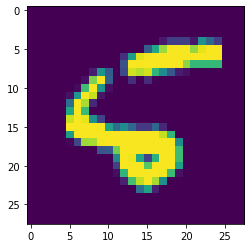

In [49]:
plt.imshow(X_test[pos_incorrect_pred[0]])

In [50]:
y_pred_decimal[pos_incorrect_pred[0]]

6

In [51]:
y_test_decimal[pos_incorrect_pred[0]]

5

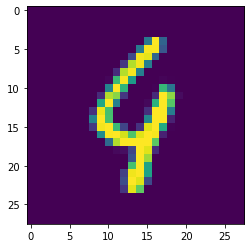

In [52]:
plt.imshow(X_test[pos_incorrect_pred[1]])

In [54]:
y_pred_decimal[pos_incorrect_pred[1]]

9

In [56]:
y_test_decimal[pos_incorrect_pred[1]]

4

In [59]:
model.save("classification_model.h5")

In [60]:
#from keras.models import load_model

In [61]:
#pretained_model=load_model("classification_model.h5")